# Time Series Forecasting Exam

In this exam, you will work on a time series forecasting task. The goal is to go through the entire workflow from loading the data to evaluating the model and making predictions. Follow each step carefully. The dataset is stored in you can access it [here](https://www.kaggle.com/datasets/khaledzsa/traffic-dataset), the target is to predict `traffic_volume` column. There is also command to download the dataset below.

## Dataset: Traffic Dataset

### Dataset Overview:

- **Name**: Traffic Dataset
- **Description**: This dataset contains hourly data on the traffic volume for westbound I-94, a major interstate highway in the US that connects Minneapolis and St Paul, Minnesota. The data was collected by the Minnesota Department of Transportation (MnDOT) from 2012 to 2018 at a station roughly midway between the two cities.
- **Time Period**: Starting from 18-11-2016
- **Frequency**: Hourly observations

### Features:

1. **temp:** a numeric variable that shows the average temperature in kelvin.
2. **rain_1h:** a numeric variable that shows the amount of rain in mm that occurred in the hour.
3. **snow_1h:** a numeric variable that shows the amount of snow in mm that occurred in the hour.
4. **clouds_all:** a numeric variable that shows the percentage of cloud cover.
5. **weather_main:** a categorical variable that gives a short textual description of the current weather (such as Clear, Clouds, Rain, etc.).
6. **weather_description:** a categorical variable that gives a longer textual description of the current weather (such as light rain, overcast clouds, etc.).
7. **date_time:** a datetime variable that shows the hour of the data collected in local CST time.
8. **traffic_volume:** a numeric variable that shows the hourly I-94 reported westbound traffic volume.

#### Feel free to add or rearrange steps as you see fit to optimize your workflow. One additional note: the model's performance doesn't need to be 100% accurate. Instead, focus on achieving the best possible results while balancing performance and generalization.

## Load the Data

Load the time series dataset into a pandas DataFrame.

**Instructions:**
- Use `pandas` to load your dataset.
- Display the first few rows to understand its structure.
- Make sure the datetime column is correctly parsed.

In [ ]:
# Here is a helping code that will download and unzip the dataset for you.
# Once you download the dataset you may comment the code!
!kaggle datasets download -d khaledzsa/traffic-dataset
!unzip traffic-dataset.zip

Dataset URL: https://www.kaggle.com/datasets/khaledzsa/traffic-dataset
License(s): unknown
100% 235k/235k [00:00<00:00, 403kB/s]
100% 235k/235k [00:00<00:00, 403kB/s]
Archive:  traffic-dataset.zip
  inflating: Traffic Data.csv        


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

## Exploratory Data Analysis (EDA)

Perform exploratory data analysis on the dataset.

**Instructions:**
- Plot the time series data.
- Analyze trends, seasonality, and potential outliers.
- Plot boxplots or scatter plots to identify any outliers or anomalies in the data.
- Seasonal Decomposition: Use `seasonal_decompose` from the `statsmodels` library to break down the time series data into trend, seasonality, and residual components. Analyze each component to gain insights into the long-term movement (trend), regular patterns (seasonality), and remaining fluctuations (residuals).

Do more if needed!

In [ ]:
df = pd.read_csv('/content/Traffic Data.csv', parse_dates=True)
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time
0,1209.0,291.15,0.0,0.0,90,Mist,mist,2017-08-27 01:00:00
1,1248.0,286.01,0.0,0.0,1,Clear,sky is clear,2018-09-06 23:00:00
2,4602.0,293.69,0.0,0.0,75,Clouds,broken clouds,2017-08-25 18:00:00
3,2838.0,262.35,0.0,0.0,1,Clear,sky is clear,2017-11-09 22:00:00
4,5794.0,267.08,0.0,0.0,5,Clear,sky is clear,2017-11-09 15:00:00


In [ ]:
df['date_time'] = pd.to_datetime(df['date_time'])
df.sort_values(by='date_time', inplace=True)
df.set_index('date_time', inplace=True)

Text(0.5, 0, 'Date')

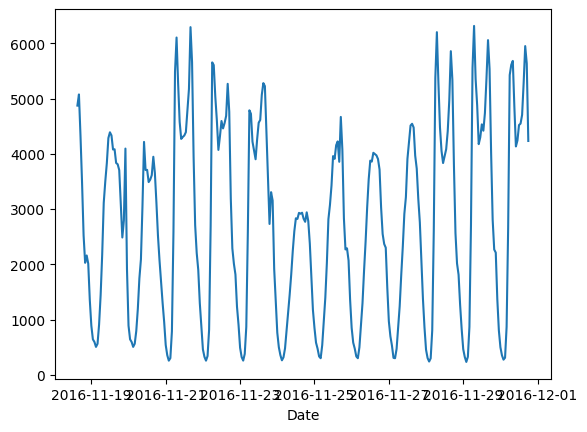

In [ ]:
plt.plot(df['date_time'][:500], df['traffic_volume'][:500])
plt.xlabel('Date')

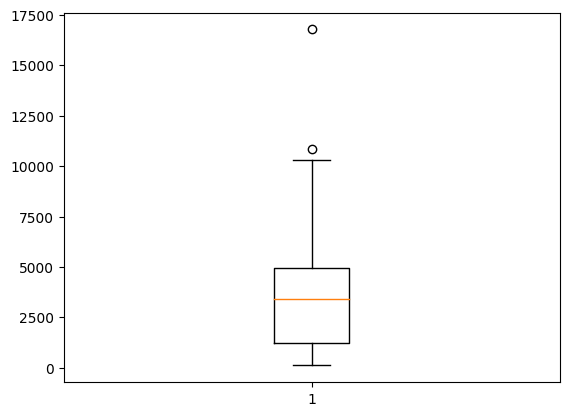

In [ ]:
plt.boxplot(df['traffic_volume'])
plt.show()

In [ ]:
def remove_outlier(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_b = Q1 - (1.5 * IQR)
    upper_b = Q3 + (1.5 * IQR)
    return df[(df[column] >= lower_b) & (df[column] <= upper_b)]

for column in df.select_dtypes('number').columns:
  df = remove_outlier(df,column)

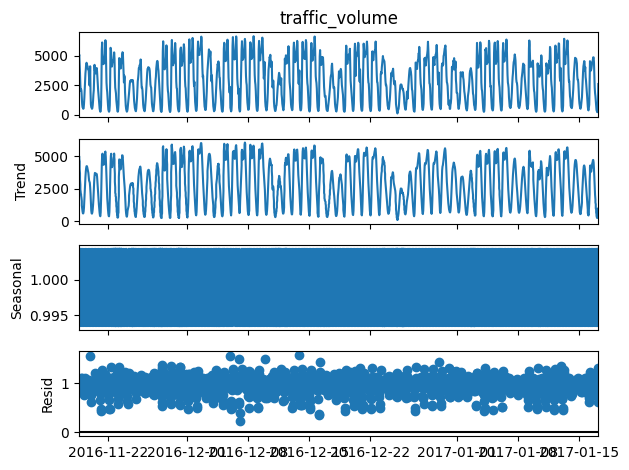

In [ ]:
result = seasonal_decompose(df['traffic_volume'][:int(len(df)*0.1)], model='multiplicative', period=4).plot() # try additive

## Data Preprocessing

Clean and preprocess the data.

**Instructions:**
- Handle any missing values in the dataset.
- If necessary, resample the data to ensure consistent time intervals.
- Create any additional features needed, such as lags or moving averages.
- Make sure that the dates are sorted correctly.

Do more if needed!

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
for i in df.select_dtypes('number').columns:
  df[i].fillna(df[i].mean(), inplace=True)
for i in df.select_dtypes('object').columns:
  df[i].fillna(df[i].mode()[0], inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 19982 entries, 2016-11-18 15:00:00 to 2018-09-30 23:00:00
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   traffic_volume       19982 non-null  float64
 1   temp                 19982 non-null  float64
 2   rain_1h              19982 non-null  float64
 3   snow_1h              19982 non-null  float64
 4   clouds_all           19982 non-null  int64  
 5   weather_main         19982 non-null  object 
 6   weather_description  19982 non-null  object 
dtypes: float64(4), int64(1), object(2)
memory usage: 1.2+ MB


In [ ]:
df.head()

,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description
date_time,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist


## Feature Engineering

### Instructions:
  
- **Shift Method**: Use the `shift` method to create a new column `prev_traffic_volume`, which represents the previous day's traffic volume.

- **Difference between traffic_volume**: Calculate the difference between the values in `traffic_volume` column to highlight short-term volume.

- **Date Features**: Extract meaningful time-based features from the `date_time` column to enhance the model's ability to detect temporal patterns. These features include:
  - **Day of the week**: To capture weekly seasonality.
  - **Month**: To capture monthly trends.
  - **Day of the year**: Useful for modeling yearly seasonality.


In [ ]:
df['prev_traffic_volume'] = df['traffic_volume'].shift(1)
df['diff_traffic_volume'] = df['traffic_volume'].diff()
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_year'] = df.index.dayofyear
df['prev_traffic_volume'] = df['prev_traffic_volume'].fillna(df['traffic_volume'][0])
df['diff_traffic_volume'] = df['diff_traffic_volume'].fillna(df['traffic_volume'][0])
df.head()

<ipython-input-10-af4d23e3f6db>:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['prev_traffic_volume'] = df['prev_traffic_volume'].fillna(df['traffic_volume'][0])
<ipython-input-10-af4d23e3f6db>:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  df['diff_traffic_volume'] = df['diff_traffic_volume'].fillna(df['traffic_volume'][0])


,traffic_volume,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,prev_traffic_volume,diff_traffic_volume,day_of_week,month,day_of_year
date_time,,,,,,,,,,,,
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Snow,heavy snow,4872.0,4872.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Fog,fog,4872.0,0.0,4,11,323
2016-11-18 15:00:00,4872.0,274.08,0.0,0.0,90,Mist,mist,4872.0,0.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Fog,fog,4872.0,202.0,4,11,323
2016-11-18 16:00:00,5074.0,273.84,0.0,0.0,90,Mist,mist,5074.0,0.0,4,11,323


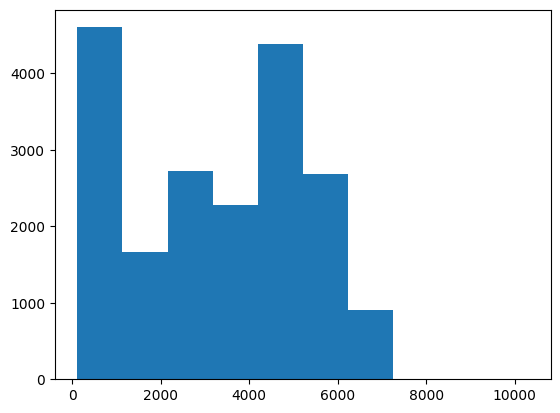

In [ ]:
plt.hist(df['traffic_volume'])
plt.show()

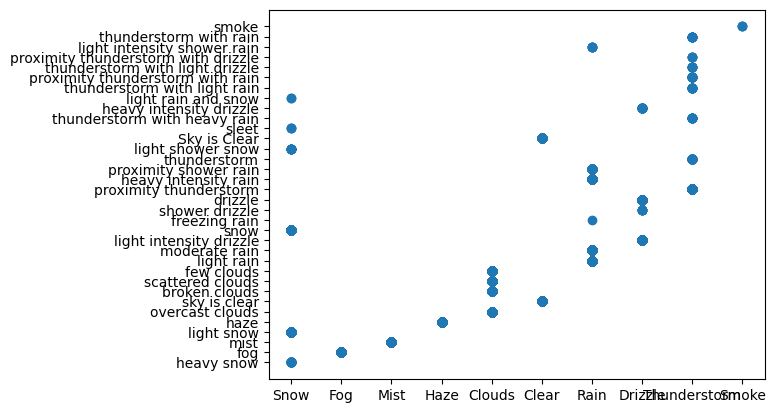

In [ ]:
plt.scatter(df['weather_main'], df['weather_description'])
plt.show()

In [ ]:
df['weather_main'].value_counts()

In [ ]:
df['weather_description'].value_counts()

> they are strongly corrlated

In [ ]:
df.drop('weather_description', inplace=True, axis=1)

## Train-Test Split

Split the dataset into training and testing sets.

**Instructions:**
- Ensure the split maintains the time order of the data.
- Decide on an appropriate ratio for splitting the data.

In [ ]:
df.columns

Index(['traffic_volume', 'temp', 'rain_1h', 'snow_1h', 'clouds_all',
       'weather_main', 'prev_traffic_volume', 'diff_traffic_volume',
       'day_of_week', 'month', 'day_of_year'],
      dtype='object')

In [ ]:
train, test = df[:int(len(df)*0.8)], df[int(len(df)*0.8):]

<h3> Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

scaler = MinMaxScaler()
labelE = OrdinalEncoder()
oneHot = OneHotEncoder() # I could try it later

pipelinee = ColumnTransformer([
    ('cat',labelE, ['weather_main']),
    ('num',scaler, df.select_dtypes('number').columns)
])

train = pipelinee.fit_transform(train)
test = pipelinee.transform(test)

In [ ]:
print(train)

[[ 8.          0.81694624 -0.29316206 ...  0.50993741  1.29862226
   1.31993506]
 [ 3.          0.81694624 -0.29316206 ...  0.50993741  1.29862226
   1.31993506]
 [ 5.          0.81694624 -0.29316206 ...  0.50993741  1.29862226
   1.31993506]
 ...
 [ 1.          0.03071238  0.50992473 ...  0.50993741 -0.54849854
  -0.4546182 ]
 [ 1.          0.06361979  0.32607552 ...  0.50993741 -0.54849854
  -0.4546182 ]
 [ 0.         -0.27811096  0.19821675 ...  0.50993741 -0.54849854
  -0.4546182 ]]


In [ ]:
def series_data(dataset, look_back):
  # dataset.values
  X_set, y_set = [], []
  for i in range(look_back, len(dataset)):
    X_set.append(dataset[i-look_back:i])
    y_set.append(dataset[i])
  return np.array(X_set), np.array(y_set)
X_train, y_train = series_data(train, 50)
X_test, y_test = series_data(test, 50)

In [ ]:
X_train.shape, y_test.shape

((15363, 50, 11), (3804, 11))

## Feature Scaling

Apply feature scaling to the data if needed.

**Instructions:**
- Use a scaling method such as MinMaxScaler or StandardScaler.
- Ensure scaling is applied correctly to both training and testing data.

<h3> Already done above

## Models Selection

Choose two models for time series forecasting.

**Instructions:**
- Select two models such as ARIMA, SARIMA, RNN, LSTM, or GRU.
- Train these models and then compare their performance.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, GRU
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import mean_squared_error

### Model 1 Training

Train your first model on the training dataset.

**Instructions:**
- Fit the first model to the training data.
- Ensure to monitor the training process.

In [ ]:
LSTM_model = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
    # Dropout(0.2),
    LSTM(units=64, return_sequences=True),
    # Dropout(0.2),
    LSTM(units=64, return_sequences=True),

    LSTM(units=64, return_sequences=True),

    LSTM(units=64),
    # Dropout(0.2),
    Dense(X_train.shape[2])
])

LSTM_model.compile(loss='mean_squared_error',
                   optimizer = 'adam')
LSTM_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_18 (LSTM)                       │ (None, 50, 64)              │          19,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_19 (LSTM)                       │ (None, 50, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 50, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 50, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_22 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 11)                  │             715 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 152,267 (594.79 KB)

 Trainable params: 152,267 (594.79 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
checkpoints = ModelCheckpoint(filepath= '/content/Models_weights/LSTM.keras', save_best_only=True )

LSTM_model.fit(X_train,y_train,
               batch_size= 64,
               epochs = 30,
               validation_split = 0.2,
               callbacks = [early_stopping, checkpoints])

Epoch 1/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step - loss: 0.7638 - val_loss: 0.4191
Epoch 2/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3937 - val_loss: 0.3810
Epoch 3/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - loss: 0.3889 - val_loss: 0.3984
Epoch 4/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - loss: 0.3842 - val_loss: 0.3797
Epoch 5/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3521 - val_loss: 0.3426
Epoch 6/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3531 - val_loss: 0.3532
Epoch 7/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3625 - val_loss: 0.3456
Epoch 8/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3461 - val_loss: 0.3639
Epoch 9/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3380 - val_loss: 0.3385
Epoch 10/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3301 - val_loss: 0.3383
Epoch 11/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - loss: 0.3326 - val_loss: 0.3329
Epoch 12/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 

### Make 1 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
LSTM_train_pred = LSTM_model.predict(X_train)
LSTM_test_pred  = LSTM_model.predict(X_test)

481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


### Model 1 Evaluation

Evaluate the performance of your first model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
print('LSTM train MSE : ', mean_squared_error(y_train, LSTM_train_pred))
print('LSTM test  MSE : ', mean_squared_error(y_test, LSTM_test_pred))

LSTM train MSE :  0.29930475700998377
LSTM test  MSE :  0.3639468933857321


In [ ]:
y_train[:100,0]

array([0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 8., 6., 6.,
       8., 2., 8., 6., 6., 2., 8., 6., 8., 8., 6., 6., 8., 8., 6., 8., 2.,
       6., 3., 6., 5., 8., 2., 6., 8., 6., 8., 5., 6., 8., 5., 2., 6., 8.,
       6., 8., 5., 8., 5., 8., 6., 3., 5., 5., 8., 5., 8., 8., 6.])

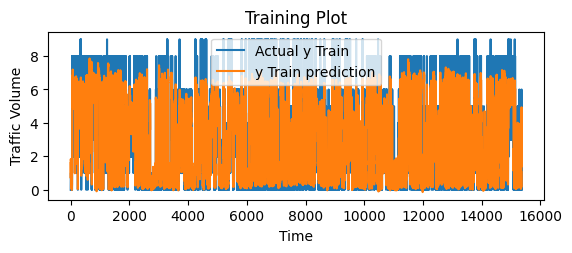

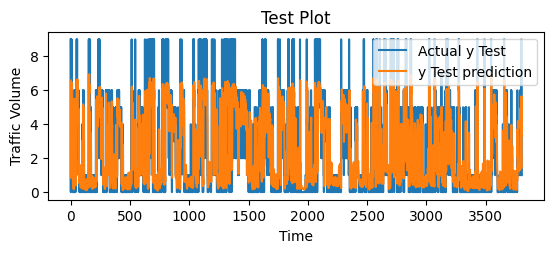

In [ ]:
plt.subplot(2,1,1)
plt.plot(y_train[:,0], label= 'Actual y Train')
plt.plot(LSTM_train_pred[:,0], label= 'y Train prediction')
plt.title('Training Plot')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(y_test[:,0], label= 'Actual y Test')
plt.plot(LSTM_test_pred[:,0], label= 'y Test prediction')
plt.title('Test Plot')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

### Model 2 Training

Train your second model on the training dataset.

**Instructions:**
- Fit the second model to the training data.
- Ensure to monitor the training process.

In [ ]:
GRU_model = Sequential([
    GRU(60, return_sequences=True, input_shape = (X_train.shape[1],X_train.shape[2])),
    GRU(60, return_sequences=True ),
    GRU(60, return_sequences=True ),
    GRU(60, return_sequences=True ),
    GRU(60, return_sequences=True ),
    GRU(60),
    Dense(X_train.shape[2])
])
GRU_model.compile(loss = 'mean_squared_error',
                  optimizer = 'adam')
GRU_model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ gru (GRU)                            │ (None, 50, 60)              │          13,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_1 (GRU)                          │ (None, 50, 60)              │          21,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_2 (GRU)                          │ (None, 50, 60)              │          21,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_3 (GRU)                          │ (None, 50, 60)              │          21,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_4 (GRU)                          │ (None, 50, 60)              │          21,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ gru_5 (GRU)                          │ (None, 60)                  │          21,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 11)                  │             671 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 123,611 (482.86 KB)

 Trainable params: 123,611 (482.86 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
checkpoints = ModelCheckpoint(filepath= '/content/Models_weights/GRU.keras', save_best_only=True )

GRU_model.fit(X_train,y_train,
               batch_size= 16,
               epochs = 30,
               validation_split = 0.2,
               callbacks = [early_stopping, checkpoints])

Epoch 1/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 18s 19ms/step - loss: 0.7298 - val_loss: 0.4415
Epoch 2/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - loss: 0.4478 - val_loss: 0.4172
Epoch 3/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.4145 - val_loss: 0.4182
Epoch 4/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - loss: 0.4091 - val_loss: 0.3827
Epoch 5/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.4030 - val_loss: 0.3944
Epoch 6/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - loss: 0.3822 - val_loss: 0.3925
Epoch 7/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.3725 - val_loss: 0.4059
Epoch 8/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.3716 - val_loss: 0.4040
Epoch 9/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - loss: 0.3627 - val_loss: 0.4098
Epoch 10/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.3482 - val_loss: 0.4009
Epoch 11/30
769/769 ━━━━━━━━━━━━━━━━━━━━ 14s 18ms/step - loss: 0.3425 - val_loss: 0.4042
Epoch 12/30
769/769 ━━━━━━━━━━

### Make 2 Predictions

Generate predictions on the test dataset.

### Instructions:
- Use the trained model to make predictions on the test data.
- Store the predictions for further analysis.

In [ ]:
GRU_train_pred = GRU_model.predict(X_train)
GRU_test_pred = GRU_model.predict(X_test)

481/481 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step


### Model 2 Evaluation

Evaluate the performance of your second model on the test dataset.

**Instructions:**
- Calculate evaluation metrics such as MAE, MSE, RMSE, or MAPE.
- Plot the predicted vs actual values for the test set.
- Plot the loss and the validation loss.

In [ ]:
print('LSTM train MSE : ', mean_squared_error(y_train, GRU_train_pred))
print('LSTM test  MSE : ', mean_squared_error(y_test, GRU_test_pred))

LSTM train MSE :  0.45563496759701644
LSTM test  MSE :  0.5182014550262607


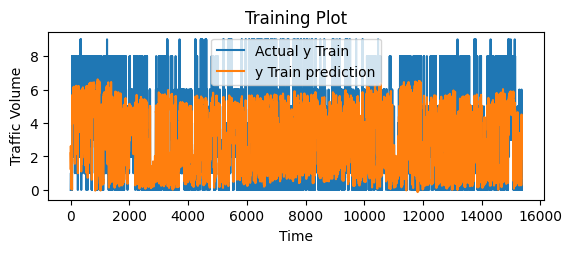

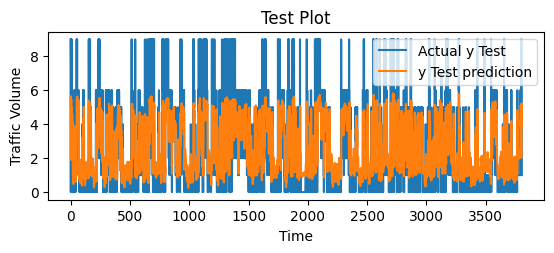

In [ ]:
plt.subplot(2,1,1)
plt.plot(y_train[:,0], label= 'Actual y Train')
plt.plot(GRU_train_pred[:,0], label= 'y Train prediction')
plt.title('Training Plot')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(y_test[:,0], label= 'Actual y Test')
plt.plot(GRU_test_pred[:,0], label= 'y Test prediction')
plt.title('Test Plot')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

### Diffrence in Preformance between LSTM & GRU

In [ ]:
plt.subplot(2,1,1)
plt.plot(y_test[:,0], label= 'Actual y Test')
plt.plot(LSTM_test_pred[:,0], label= 'y Test prediction')
plt.title('LSTM Plot')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(y_test[:,0], label= 'Actual y Test')
plt.plot(GRU_test_pred[:,0], label= 'y Test prediction')
plt.title('GRU Plot')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, handling missing values). How did these techniques help prepare the data for training the model?
> - The mean is the best fit for the numarical data it does not affect the distrbution and could represent realstic data

2. **Feature Engineering**: Did you perform any feature engineering or transformations? Describe your decisions and how these new features (or transformed features) contributed to the forecasting model.
> - I did with the features generated above (dayOfTheWeek, differentce between the traffic, ...) helped giving the model more data and better represntation of the real world

3. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the type of model, layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for time series forecasting?
> - I choose LSTM for it ability in remembering and understanding complixe data
> - number of neurons is choosen based on try and test,
> - Then I choose GRU it has the ability to remeber and lighter than LSTM ( thesame case for LSTM in the rest)
> - LSTM and GRU with the rest of the time series models are suited for these type of proplem beacuse of the hidden state (or cell state) the memory it has and feding the input to the model in a sequntial matter and all at once since some output depends on the preivous output.

4. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
> - for the optimizer adam is the best based on my try and test.
> - batch size I tryed to make the model train fast but not too large
> - note: for batch_size I tried 32,16,64 the different between 16-64 in the loss values is 0.2

5. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics (e.g., MAE, RMSE, MAPE)? How do they align with the objective of forecasting?

> - for forecasting problem we need to use MSE becasuse it is numarical data and here we are predicting samples we need the exact different between the pred and actual

6. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
>  I could preform model tuning for the number of neurans and layers but  it would be time consuming and heavy task
> - I did Tuning for the use of features (either 1 or the whole features) and I tried different number of units and layer for both models

7. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?
> - I did notice overfitting but early stopping handle it for me
8. **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. Consider using different algorithms, feature engineering techniques, or tuning hyperparameters.
>- I could try One-hot encoder since i have one object feature and the uniqe values are not that high
>- adding more units and layers, adding Dropout if it converge too fast

### Answer Here:

# One feature (traffic volume) Model

In [ ]:
def series_data_one(dataset, look_back):
  # dataset.values
  X_set, y_set = [], []
  for i in range(look_back, len(dataset)):
    X_set.append(dataset[i-look_back:i,0])
    y_set.append(dataset[i,0])
  return np.array(X_set), np.array(y_set)

X_train_1D, y_train_1D = series_data_one(train, 50)
X_test_1D, y_test_1D = series_data_one(test, 50)

In [ ]:
X_train_1D.shape, y_test_1D.shape

((15363, 50), (3804,))

In [ ]:
LSTM_model_2 = Sequential([
    LSTM(units=64, return_sequences=True, input_shape=(50,1)),
    # Dropout(0.2),
    LSTM(units=64, return_sequences=True),
    # Dropout(0.2),
    LSTM(units=64, return_sequences=True),

    LSTM(units=64, return_sequences=True),

    LSTM(units=64),
    # Dropout(0.2),
    Dense(1)
])

LSTM_model_2.compile(loss='mean_squared_error',
                   optimizer = 'adam')

LSTM_model_2.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_52 (LSTM)                       │ (None, 50, 64)              │          16,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_53 (LSTM)                       │ (None, 50, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_54 (LSTM)                       │ (None, 50, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_55 (LSTM)                       │ (None, 50, 64)              │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_56 (LSTM)                       │ (None, 64)                  │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 149,057 (582.25 KB)

 Trainable params: 149,057 (582.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)
checkpoints = ModelCheckpoint(filepath= '/content/Models_weights/only target/LSTM.keras', save_best_only=True )

LSTM_model_2.fit(X_train_1D,y_train_1D,
               batch_size= 64,
               epochs = 30,
               validation_split = 0.2,
               callbacks = [early_stopping, checkpoints])

Epoch 1/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 11s 28ms/step - loss: 8.2489 - val_loss: 6.3839
Epoch 2/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 4.4381 - val_loss: 3.8666
Epoch 3/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 3.7680 - val_loss: 3.5778
Epoch 4/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 3.6834 - val_loss: 3.7008
Epoch 5/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 3.6365 - val_loss: 3.5981
Epoch 6/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 3.6442 - val_loss: 3.6575
Epoch 7/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 3.6933 - val_loss: 3.7666
Epoch 8/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 3.9102 - val_loss: 3.6177
Epoch 9/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 25ms/step - loss: 3.6758 - val_loss: 3.7143
Epoch 10/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 26ms/step - loss: 3.7258 - val_loss: 3.5671
Epoch 11/30
193/193 ━━━━━━━━━━━━━━━━━━━━ 5s 24ms/step - loss: 3.5711 - val_loss: 3.6656
Epoch 12/30
193/193 ━━━━━━━━━━━━━━━━━━━━

In [ ]:
LSTM_train_pred_1D = LSTM_model_2.predict(X_train_1D)
LSTM_test_pred_1D  = LSTM_model_2.predict(X_test_1D)

481/481 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step
119/119 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step


In [ ]:
LSTM_train_pred.shape

(15363, 1)

In [ ]:
y_train_1D.shape

(15363,)

LSTM train MSE :  3.1655916319404236
LSTM test  MSE :  3.8434998317743396


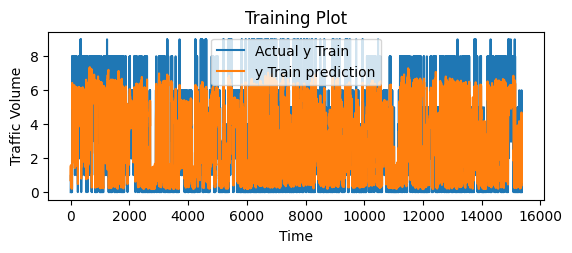

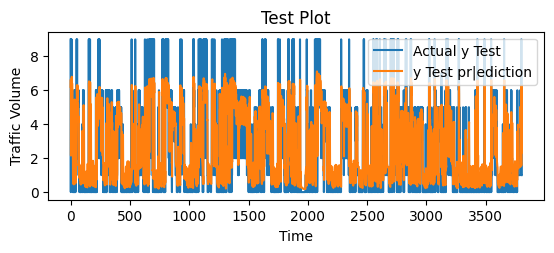

In [ ]:
plt.subplot(2,1,1)
plt.plot(y_train_1D, label= 'Actual y Train')
plt.plot(LSTM_train_pred_1D, label= 'y Train prediction')
plt.title('Training Plot')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

plt.subplot(2,1,2)
plt.plot(y_test_1D, label= 'Actual y Test')
plt.plot(LSTM_test_pred_1D, label= 'y Test pr|ediction')
plt.title('Test Plot')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()

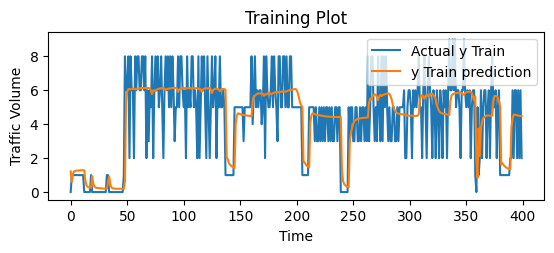

In [ ]:
plt.subplot(2,1,1)
plt.plot(y_train_1D[:400], label= 'Actual y Train')
plt.plot(LSTM_train_pred_1D[:400], label= 'y Train prediction')
plt.title('Training Plot')
plt.xlabel('Time')
plt.ylabel('Traffic Volume')
plt.legend()
plt.show()